<a href="https://colab.research.google.com/github/alanasofia12/Analitica1/blob/main/parcial_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PARCIAL#1**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #este es el graficador
#Conección con la nube
from google.colab import drive
drive.mount('/content/drive')

#Las librerias para el modelo son:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**MODELO NAIVE BAYES**

In [ ]:
XDB=XDB[['Age', 'Mother_Edu', 'Father_Edu', 'FamilySize', 'Self_Esteem', 'Height', 'Weight', 'Income', 'HealthPlan']] # Added 'HealthPlan' to the list of features
XDB=XDB.dropna()

#Separamos las variables por Entrada-Salida
XD=np.array(XDB[['Age', 'Mother_Edu', 'Father_Edu', 'FamilySize', 'Self_Esteem', 'Height', 'Weight', 'Income']])
yd=np.array(XDB[['HealthPlan']]) # Changed 'Height' to 'HealthPlan'

# Implementar el modelo
mnd=GaussianNB()
mnd.fit(XD,yd)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [ ]:
mnd=GaussianNB()
mnd.fit(XD,yd)
ydp=mnd.predict (XD)
u=mnd.theta_
sigma=np.sqrt(mnd.var_)


LI=u-sigma
LS=u+sigma

print("la media de las variables por categoria es:")
print (u)
print("el limite inferior de la variación de las variables por categoria es:")
print(LI)
print("el limite superior de la variación de las variables por categoria es:")
print(LS)


cm=confusion_matrix(yd,ydp)

la media de las variables por categoria es:
[[1.82731536e+01 1.00539273e+01 9.79835873e+00 4.98124267e+00
  2.15439625e+01 6.68968347e+01 1.46289566e+02 1.64244736e+04]
 [1.83774951e+01 1.12438356e+01 1.12348337e+01 4.64559687e+00
  2.26039139e+01 6.69878669e+01 1.45515264e+02 3.52898006e+04]]
el limite inferior de la variación de las variables por categoria es:
[[ 1.58014883e+01  6.53322127e+00  5.64295859e+00  2.36569890e+00
   1.73637695e+01  6.27366971e+01  1.16892834e+02 -5.10089697e+03]
 [ 1.59052901e+01  7.95022400e+00  7.19790354e+00  2.20821477e+00
   1.84083335e+01  6.28048306e+01  1.15250048e+02 -1.02481403e+03]]
el limite superior de la variación de las variables por categoria es:
[[2.07448189e+01 1.35746334e+01 1.39537589e+01 7.59678645e+00
  2.57241555e+01 7.10569723e+01 1.75686299e+02 3.79498442e+04]
 [2.08497001e+01 1.45374472e+01 1.52717638e+01 7.08297897e+00
  2.67994943e+01 7.11709032e+01 1.75780481e+02 7.16044152e+04]]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:

ydp=mnb.predict(XD)

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(yd,ydp)
print(cm)

VN=cm[0,0];FP=cm[0,1];FN=cm[1,0];VP=cm[1,1]

Ex=(VN+VP)/(VN+FP+FN+VP)
print("La exactitud es:",Ex)

TE=(FN+FP)/(VN+FP+FN+VP)
print("La tasa de error es:",TE)

Sen=VP/(VP+FN)
print("La sensibilidad es:",Sen)

Esp=VN/(VN+FP)
print("La especificidad es:",Esp)

pre=VP/(VP+FP)
print("El presición es:",pre)

pren=VN/(VN+FN)
print("El presición negativa es:",pren)



[[ 113  740]
 [ 265 4845]]
La exactitud es: 0.8314606741573034
La tasa de error es: 0.16853932584269662
La sensibilidad es: 0.9481409001956947
La especificidad es: 0.1324736225087925
El presición es: 0.8675022381378693
El presición negativa es: 0.29894179894179895


In [ ]:
#Para evaluar un caso
XS=[[18,12,12,5,28,71,180,48000]]
mnb.predict(XS)

array([1.])

Se puede analizar del modelo es que tiene un total de datos de 5963, con un porcetil de 0,14 y 0,85.

Tambien podemos deccir que la tasa de error es de 0,16 que signfica que es relativamente alta y con una exactitud muy buena de 0,83

**Arbol de decision**

In [ ]:
mar=DecisionTreeClassifier(criterion='gini', max_depth=4)
mar.fit(XD,yd)

#Se procede con el despliegue del arbol
from sklearn.tree import export_graphviz #Para exportar
from pydotplus import graph_from_dot_data #Crear el gráfico

vs=['Age', 'Mother_Edu', 'Father_Edu', 'FamilySize', 'Self_Esteem', 'Height', 'Weight', 'Income']

dot_data=export_graphviz(mar,feature_names=vs)
graph=graph_from_dot_data(dot_data)
graph.write_png('ArbolHealthPlan.png')

True

In [ ]:
# Realizar la predicción utilizando el modelo entrenado (mar)
ydp = mar.predict(XD)

# Agregar las predicciones como una nueva columna al DataFrame XDB2
XDB['HealthPlan_Predicción'] = ydp

# Mostrar las predicciones junto con otros datos relevantes
print(XDB[['HealthPlan', 'HealthPlan_Predicción']])

#Crear el informe con el College
dfp=pd.DataFrame(np.column_stack((XD,ydp)))
dfp.columns=['Age', 'Mother_Edu', 'Father_Edu', 'FamilySize', 'Self_Esteem', 'Height', 'Weight', 'Income','HealthPlan']
dfp.head(10)
dfp.to_excel("InformeHealhPlan.xlsx")

       HealthPlan  HealthPlan_Predicción
1             1.0                    1.0
5             1.0                    1.0
6             1.0                    1.0
7             1.0                    1.0
8             1.0                    1.0
...           ...                    ...
12557         1.0                    1.0
12565         1.0                    1.0
12647         1.0                    1.0
12651         1.0                    1.0
12678         1.0                    1.0

[5963 rows x 2 columns]


In [ ]:
mar = DecisionTreeClassifier(criterion='gini', max_depth=4)  # Ajusta los parámetros según tus necesidades
mar.fit(XD, yd)  # XD: Datos de entrada, yd: Datos de salida
mar = DecisionTreeClassifier(criterion='gini', max_depth=4)  # Ajusta los parámetros según tus necesidades
mar.fit(XD, yd)  # XD: Datos de entrada, yd: Datos de salida
XS = [[18, 12, 12, 5, 28, 71, 180, 48000]]  # Ejemplo de datos para predecir
prediccion = mar.predict(XS)
print(prediccion)

[1.]


In [ ]:

ydp=mar.predict(XD)
cm=confusion_matrix(yd,ydp)
print(cm)

VN=cm[0,0];FP=cm[0,1];FN=cm[1,0];VP=cm[1,1]

Ex=(VN+VP)/(VN+FP+FN+VP)
print("La exactitud es:",Ex)

TE=(FN+FP)/(VN+FP+FN+VP)
print("La tasa de error es:",TE)

Sen=VP/(VP+FN)
print("La sensibilidad es:",Sen)

Esp=VN/(VN+FP)
print("La especificidad es:",Esp)

pre=VP/(VP+FP)
print("El presición es:",pre)

pren=VN/(VN+FN)
print("El presición negativa es:",pren)

[[   3  850]
 [   0 5110]]
La exactitud es: 0.8574543015260775
La tasa de error es: 0.1425456984739225
La sensibilidad es: 1.0
La especificidad es: 0.0035169988276670576
El presición es: 0.8573825503355704
El presición negativa es: 1.0


**CLUSTERIZACION**

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


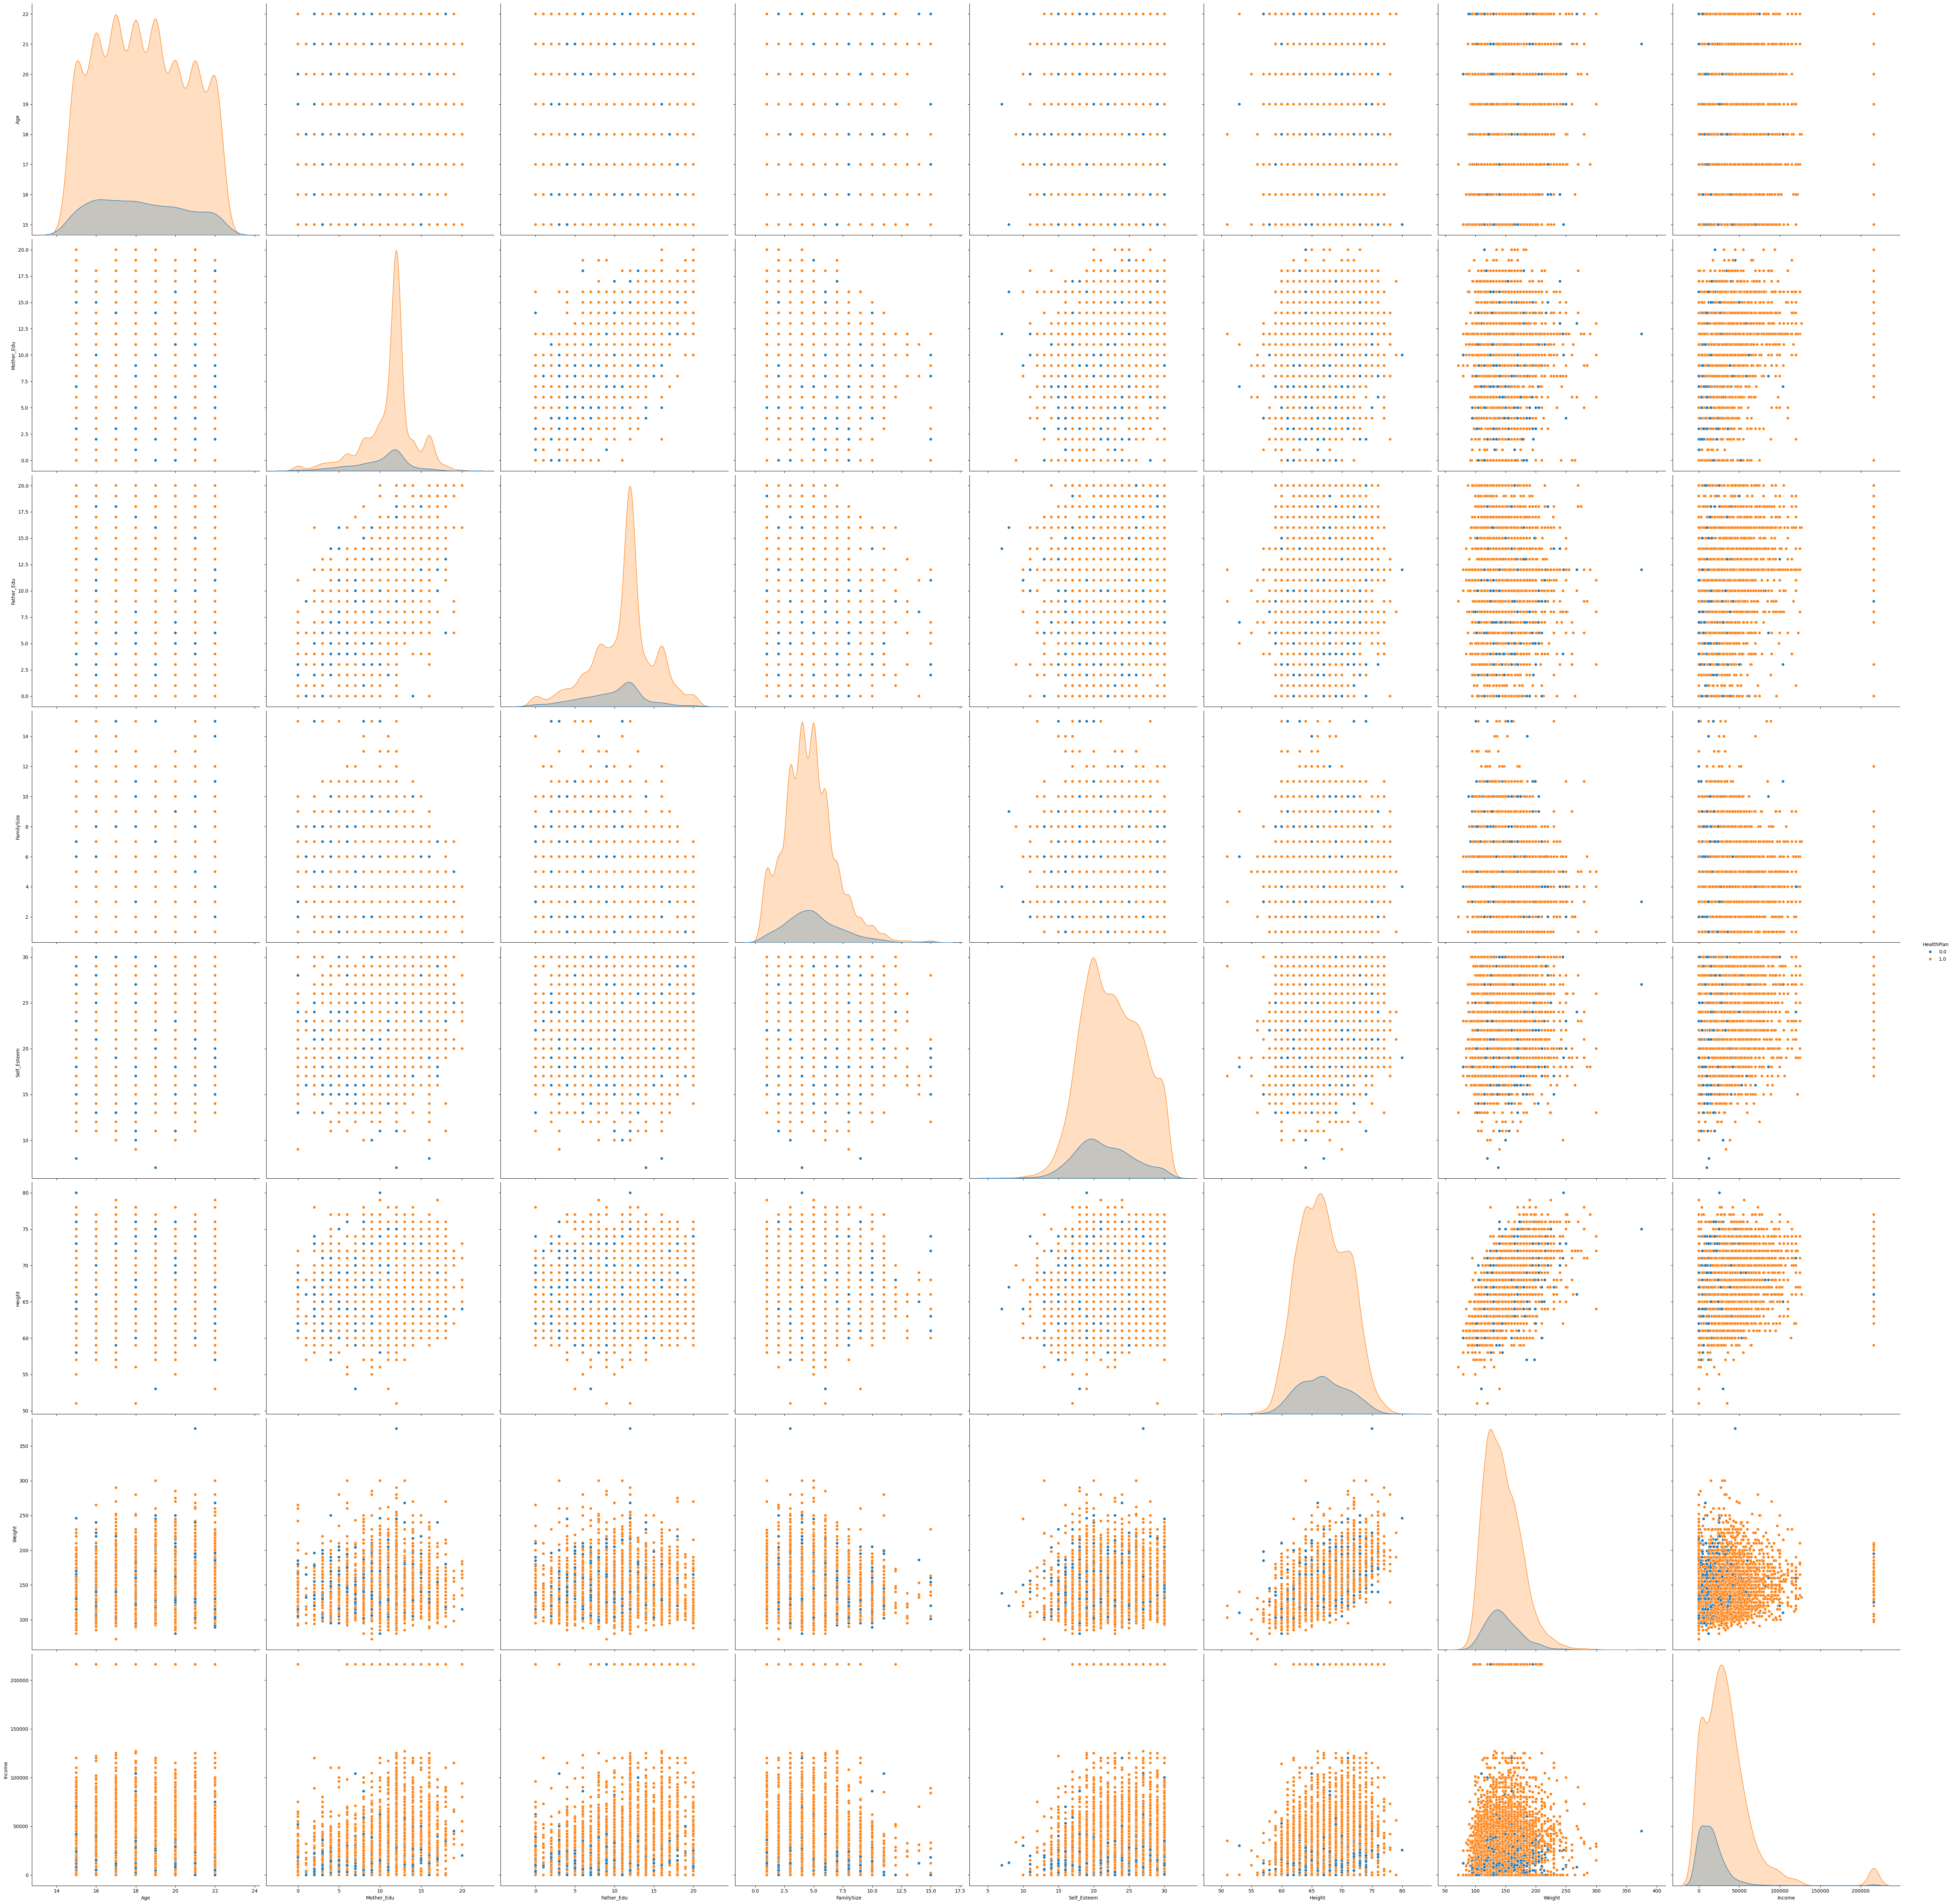

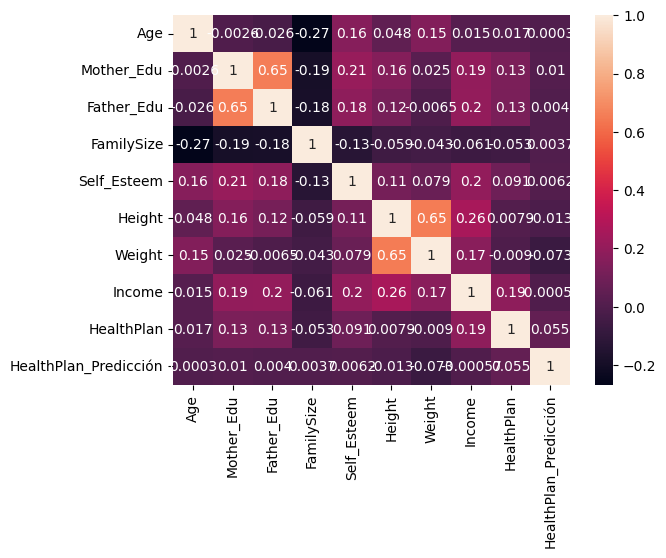

In [ ]:

#Graficos de correlación
import seaborn as sns
sns.pairplot(XDB, hue='HealthPlan', size=7, vars=['Age', 'Mother_Edu', 'Father_Edu', 'FamilySize', 'Self_Esteem', 'Height', 'Weight', 'Income'])
plt.show()

plt.figure()
sns.heatmap(XDB.corr(), annot=True)
plt.show()

Age  Mother_Edu  Father_Edu  FamilySize  Self_Esteem     Height  \
0  18.352564   11.695869   11.824074    4.502137    23.308405  68.292023   
1  18.383361   10.591343   10.383924    4.854413    21.549185  65.676785   
2  18.632479   13.256410   13.752137    4.324786    24.897436  69.692308   
3  18.340949   10.703866   10.568541    4.750439    22.212214  66.659051   
4  18.348837   12.547804   13.000000    4.426357    24.170543  69.198966   

       Weight         Income  
0  152.443732   49125.363248  
1  139.277122    4246.270377  
2  160.435897  216200.000000  
3  144.007030   25652.303603  
4  155.121447   88203.589147

Los clusters a los que pertenecen las personas son:
 [1 0 3 ... 0 0 3]


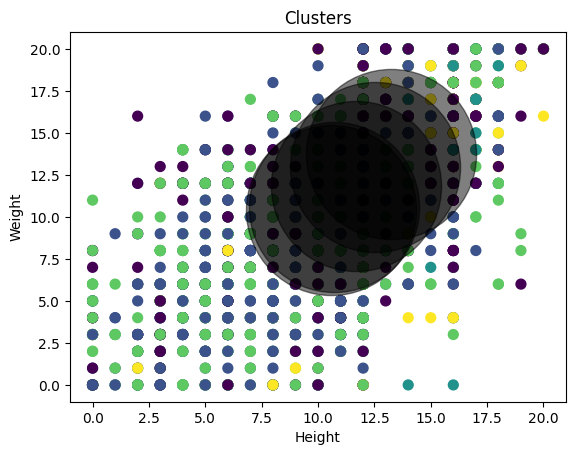

In [ ]:
np.random.seed(42) #Se generan los mismos numeros aleatorios
NC=5 #Numero de clusters
mkm=KMeans(n_clusters=NC, init='random', random_state=42)
mkm.fit(XD,yd)

#Cuáles son los gráficos creados
dfc=pd.DataFrame(mkm.cluster_centers_)
dfc.columns=['Age', 'Mother_Edu', 'Father_Edu', 'FamilySize', 'Self_Esteem', 'Height', 'Weight', 'Income']
display(dfc)

#A qué sucursal o cluster pertenece una persona
ydc=mkm.predict(XD) #Solo ydc control shift enter
print('Los clusters a los que pertenecen las personas son:\n',ydc)

#Se procede con la gráfica de los clusters
plt.figure()
# Access data using .iloc for integer-location based indexing
plt.scatter(XDB.iloc[:, 1], XDB.iloc[:, 2], c=ydc, s=50, cmap='viridis') # Changed XD[:,1] to XD.iloc[:, 1] and XD[:,2] to XD.iloc[:, 2]
plt.scatter(dfc.iloc[:, 1], dfc.iloc[:, 2], c='black', s=15000, alpha=0.5)
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Clusters')
plt.show()

Age  Mother_Edu  Father_Edu  FamilySize  Self_Esteem     Height  \
0  18.352564   11.695869   11.824074    4.502137    23.308405  68.292023   
1  18.383361   10.591343   10.383924    4.854413    21.549185  65.676785   
2  18.632479   13.256410   13.752137    4.324786    24.897436  69.692308   
3  18.340949   10.703866   10.568541    4.750439    22.212214  66.659051   
4  18.348837   12.547804   13.000000    4.426357    24.170543  69.198966   

       Weight         Income  
0  152.443732   49125.363248  
1  139.277122    4246.270377  
2  160.435897  216200.000000  
3  144.007030   25652.303603  
4  155.121447   88203.589147

Los clusters a los que pertenecen las personas son:
 [1 0 3 ... 0 0 3]


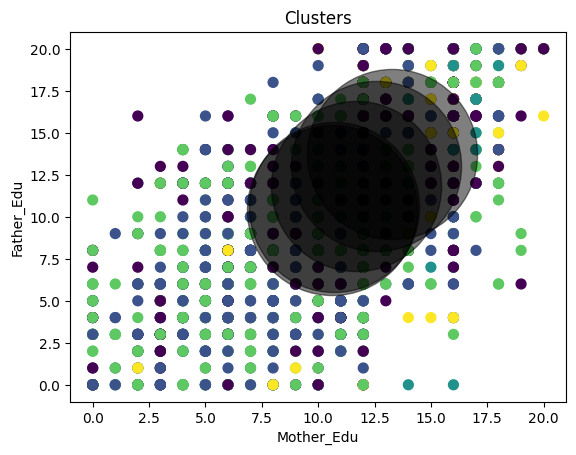

In [ ]:
np.random.seed(42) #Se generan los mismos numeros aleatorios
NC=5 #Numero de clusters
mkm=KMeans(n_clusters=NC, init='random', random_state=42)
mkm.fit(XD,yd)

#Cuáles son los gráficos creados
dfc=pd.DataFrame(mkm.cluster_centers_)
dfc.columns=['Age', 'Mother_Edu', 'Father_Edu', 'FamilySize', 'Self_Esteem', 'Height', 'Weight', 'Income']
display(dfc)

#A qué sucursal o cluster pertenece una persona
ydc=mkm.predict(XD) #Solo ydc control shift enter
print('Los clusters a los que pertenecen las personas son:\n',ydc)

#Se procede con la gráfica de los clusters
plt.figure()
# Access data using .iloc for integer-location based indexing
plt.scatter(XDB.iloc[:, 1], XDB.iloc[:, 2], c=ydc, s=50, cmap='viridis') # Changed XD[:,1] to XD.iloc[:, 1] and XD[:,2] to XD.iloc[:, 2]
plt.scatter(dfc.iloc[:, 1], dfc.iloc[:, 2], c='black', s=15000, alpha=0.5)
plt.xlabel('Mother_Edu')
plt.ylabel('Father_Edu')
plt.title('Clusters')
plt.show()

In [ ]:
#se determina el porcentanje de preaprobacion por categoria cluster
ND=np.bincount(ydc)
XDB['cluster']=ydc
display(XDB) #se determina el porcentanje de preaprobacion por categoria cluster

#numero de personas aprobada por sucursal o cluster
NApr=XDB.groupby('cluster').agg({'HealthPlan':lambda x:(x==1).sum()})
NAprp=np.array(NApr)/ND[:,None]
Nneg=XDB.groupby('cluster').agg({'HealthPlan':lambda x:(x==0).sum()})
Nnegp=np.array(Nneg)/ND[:,None]
#numero de personas aprobada por sucursal o cluster

df2=pd.DataFrame(np.column_stack((ND,NApr,Nneg,NAprp,Nnegp)))
df2.columns=['ND','NApr','Nneg','%Apr','%Neg']
display(df2)

Age  Mother_Edu  Father_Edu  FamilySize  Self_Esteem  Height  Weight  \
1       20         5.0         8.0           5         16.0    62.0   120.0   
5       19        12.0        12.0           4         27.0    64.0   200.0   
6       15        12.0        12.0           3         26.0    65.0   131.0   
7       21         9.0         6.0           3         23.0    65.0   179.0   
8       16        12.0        10.0           6         26.0    66.0   145.0   
...    ...         ...         ...         ...          ...     ...     ...   
12557   20        12.0        12.0           5         20.0    60.0   110.0   
12565   20        12.0        11.0           2         24.0    63.0   152.0   
12647   21        16.0        12.0           1         30.0    70.0   180.0   
12651   21        16.0        16.0           1         27.0    73.0   170.0   
12678   21         8.0         8.0           1         19.0    70.0   180.0   

        Income  HealthPlan  HealthPlan_Predicción  cluster  
1          0.0         1.0                    1.0        1  
5      40000.0         1.0                    1.0        0  
6      25000.0         1.0                    1.0        3  
7      27400.0         1.0                    1.0        3  
8      52000.0         1.0                    1.0        0  
...        ...         ...                    ...      ...  
12557   1000.0         1.0                    1.0        1  
12565  38000.0         1.0                    1.0        0  
12647  43600.0         1.0                    1.0        0  
12651  40000.0         1.0                    1.0        0  
12678  17000.0         1.0                    1.0        3  

[5963 rows x 11 columns]

ND    NApr   Nneg      %Apr      %Neg
0  1404.0  1353.0   51.0  0.963675  0.036325
1  1779.0  1320.0  459.0  0.741990  0.258010
2   117.0   112.0    5.0  0.957265  0.042735
3  2276.0  1947.0  329.0  0.855448  0.144552
4   387.0   378.0    9.0  0.976744  0.023256

In [ ]:
ydp=np.zeros((len(ydc),1))

for k in range(len(ydp)):
  print('la persona:',k)
  print('pertenece al cluster', ydc[k])
  ncl=ydc[k]
  print('porcentaje de negación es:',Nnegp[ncl])
  print('porcentaje de aprobacion es:',NAprp[ncl])

  if NAprp[ncl]>Nnegp[ncl]:
    print('se aprueba')
    ydp[k]=1
  else:
      print('se niega')
      ydp[k]=0

XDB['pronostico']=ydp
display(XDB)
XDB.to_excel('InformeCluster.xlsx')

Se truncaron las últimas líneas 5000 del resultado de transmisión.
la persona: 4963
pertenece al cluster 3
porcentaje de negación es: [0.14455185]
porcentaje de aprobacion es: [0.85544815]
se aprueba
la persona: 4964
pertenece al cluster 0
porcentaje de negación es: [0.03632479]
porcentaje de aprobacion es: [0.96367521]
se aprueba
la persona: 4965
pertenece al cluster 1
porcentaje de negación es: [0.25801012]
porcentaje de aprobacion es: [0.74198988]
se aprueba
la persona: 4966
pertenece al cluster 1
porcentaje de negación es: [0.25801012]
porcentaje de aprobacion es: [0.74198988]
se aprueba
la persona: 4967
pertenece al cluster 0
porcentaje de negación es: [0.03632479]
porcentaje de aprobacion es: [0.96367521]
se aprueba
la persona: 4968
pertenece al cluster 3
porcentaje de negación es: [0.14455185]
porcentaje de aprobacion es: [0.85544815]
se aprueba
la persona: 4969
pertenece al cluster 0
porcentaje de negación es: [0.03632479]
porcentaje de aprobacion es: [0.96367521]
se aprueba
la

Age  Mother_Edu  Father_Edu  FamilySize  Self_Esteem  Height  Weight  \
1       20         5.0         8.0           5         16.0    62.0   120.0   
5       19        12.0        12.0           4         27.0    64.0   200.0   
6       15        12.0        12.0           3         26.0    65.0   131.0   
7       21         9.0         6.0           3         23.0    65.0   179.0   
8       16        12.0        10.0           6         26.0    66.0   145.0   
...    ...         ...         ...         ...          ...     ...     ...   
12557   20        12.0        12.0           5         20.0    60.0   110.0   
12565   20        12.0        11.0           2         24.0    63.0   152.0   
12647   21        16.0        12.0           1         30.0    70.0   180.0   
12651   21        16.0        16.0           1         27.0    73.0   170.0   
12678   21         8.0         8.0           1         19.0    70.0   180.0   

        Income  HealthPlan  HealthPlan_Predicción  cluster  pronostico  
1          0.0         1.0                    1.0        1         1.0  
5      40000.0         1.0                    1.0        0         1.0  
6      25000.0         1.0                    1.0        3         1.0  
7      27400.0         1.0                    1.0        3         1.0  
8      52000.0         1.0                    1.0        0         1.0  
...        ...         ...                    ...      ...         ...  
12557   1000.0         1.0                    1.0        1         1.0  
12565  38000.0         1.0                    1.0        0         1.0  
12647  43600.0         1.0                    1.0        0         1.0  
12651  40000.0         1.0                    1.0        0         1.0  
12678  17000.0         1.0                    1.0        3         1.0  

[5963 rows x 12 columns]

La persona pertenece al cluster [0]
Porcentaje de negación: [[0.03632479]]
Porcentaje de aprobacion: [[0.96367521]]


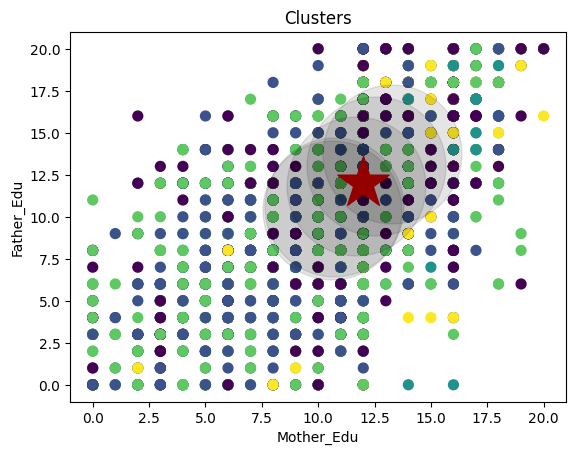

In [ ]:
#Pronóstico persona
XDN=np.array([18,12,12,5,28,71,180,48000])
ydn=mkm.predict(XDN.reshape(1,-1))
print('La persona pertenece al cluster',ydn)
print('Porcentaje de negación:',Nnegp[ydn])
print('Porcentaje de aprobacion:',NAprp[ydn])

plt.figure()
# Access data using .iloc for integer-location based indexing
plt.scatter(XDB.iloc[:, 1], XDB.iloc[:, 2], c=ydc, s=50, cmap='viridis') # Changed XD[:,1] to XD.iloc[:, 1] and XD[:,2] to XD.iloc[:, 2]
plt.scatter(XDN[1], XDN[2], marker='*', s=1500, facecolors='red')
plt.scatter(dfc.iloc[:, 1], dfc.iloc[:, 2], c='black', s=10000, alpha=0.1)
plt.xlabel('Mother_Edu')
plt.ylabel('Father_Edu')
plt.title('Clusters')
plt.show()

In [ ]:
#Análisis del desempeño
cm=confusion_matrix(yd,ydp)
print(cm)

[[   0  853]
 [   0 5110]]


In [ ]:


VN=cm[0,0];FP=cm[0,1];FN=cm[1,0];VP=cm[1,1]

Ex=(VN+VP)/(VN+FP+FN+VP)
print("La exactitud es:",Ex)

TE=(FN+FP)/(VN+FP+FN+VP)
print("La tasa de error es:",TE)

Sen=VP/(VP+FN)
print("La sensibilidad es:",Sen)

Esp=VN/(VN+FP)
print("La especificidad es:",Esp)

pre=VP/(VP+FP)
print("El presición es:",pre)

pren=VN/(VN+FN)
print("El presición negativa es:",pren)

La exactitud es: 0.8314606741573034
La tasa de error es: 0.16853932584269662
La sensibilidad es: 0.9481409001956947
La especificidad es: 0.1324736225087925
El presición es: 0.8675022381378693
El presición negativa es: 0.29894179894179895


El analisis indica que :
Que las variables mas correlacionadas son 4: las dos primeras son mother_edu y father_edu con un porcentaje de 0.65, las otras dos son weight y height, ademas, menos correlacion tiene es self_esteem y income con un 0.2.

El cluster que mas income tiene es el 4 con un valor de 88203.589147, el cluster que menos income tiene es el 1 con un valor de 4246.27037, el cluster que alto en weight es el 1 con un valor de 139.277122, el cluster con mayor age es el 1 con un valor de 18.632479, el cluster con height  mas alta es el 2 con un valor de 69.692308.
El modelo de cluster tiene una margen de error de 0,16 bajito ya que su tasa de exctitud es de 0,83 que da un buen pronostico para este modelo en especifico.


**ANALISIS COMPLETO**
1. Modelo tiene una tasa de exactitud de 0,83 lo que quiere decir que es muy bueno, por ende, la tasa de erro es bajita con 0,16, quiere deci que el modelo es relativamente bueno.

2. Mdelo tiene una tasa de exactitud de 0,85 lo que quiere decir que es algo muy positivo y puede llegar a ser muy preciso, por ende, su tasa de error es de 0,14,  lo que quiere decir que el modelo de arbol de decision pueda llegar a ser mas preciso que el primer modelo.

3. El modelo tiene una tasa de exactitud de 0,83(que es igual al primer modelo) con una tasa de error de 0,16, por ende, el modelo sigue siendo bueno, pero el segundo modelo sigue siendo mas preciso y mejor que los otros a comparar.


